In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats
import pylab as pl

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.00,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.00,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.00,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,0.01,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.61,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


In [4]:
data

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.00,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.00,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.00,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,0.01,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.61,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-27,1.12,NaN,0.01,NaN,66,55,270.0,260.0,8.9,18.1,1.0,NaN,1.0
1823,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-28,4.70,NaN,1.81,NaN,56,47,90.0,260.0,14.1,21.0,1.0,NaN,NaN
1824,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-29,1.57,NaN,0.00,NaN,65,42,340.0,360.0,10.1,18.1,NaN,NaN,NaN
1825,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-30,0.45,NaN,0.00,NaN,69,44,260.0,260.0,6.9,12.1,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1827 non-null   object 
 1   NAME     1827 non-null   object 
 2   DATE     1827 non-null   object 
 3   AWND     1823 non-null   float64
 4   PGTM     62 non-null     float64
 5   PRCP     1827 non-null   float64
 6   TAVG     0 non-null      float64
 7   TMAX     1827 non-null   int64  
 8   TMIN     1827 non-null   int64  
 9   WDF2     1822 non-null   float64
 10  WDF5     1809 non-null   float64
 11  WSF2     1823 non-null   float64
 12  WSF5     1809 non-null   float64
 13  WT01     551 non-null    float64
 14  WT02     39 non-null     float64
 15  WT08     861 non-null    float64
dtypes: float64(11), int64(2), object(3)
memory usage: 228.5+ KB


In [6]:
data.isnull().sum()

STATION       0
NAME          0
DATE          0
AWND          4
PGTM       1765
PRCP          0
TAVG       1827
TMAX          0
TMIN          0
WDF2          5
WDF5         18
WSF2          4
WSF5         18
WT01       1276
WT02       1788
WT08        966
dtype: int64

<AxesSubplot:>

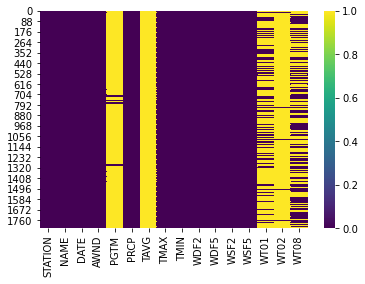

In [7]:
sns.heatmap(data.isnull(),cmap='viridis')

In [8]:
null_var = (data.isnull().sum()/data.shape[0])*100
null_var

STATION      0.000000
NAME         0.000000
DATE         0.000000
AWND         0.218938
PGTM        96.606459
PRCP         0.000000
TAVG       100.000000
TMAX         0.000000
TMIN         0.000000
WDF2         0.273673
WDF5         0.985222
WSF2         0.218938
WSF5         0.985222
WT01        69.841270
WT02        97.865353
WT08        52.873563
dtype: float64

In [9]:
drop_columns = null_var[null_var>52].keys
drop_columns

<bound method Series.keys of PGTM     96.606459
TAVG    100.000000
WT01     69.841270
WT02     97.865353
WT08     52.873563
dtype: float64>

In [10]:
data = data.drop(['PGTM','TAVG','WT01','WT02','WT08'],axis = 1)

In [11]:
data

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,0.00,64,43,10.0,30.0,8.1,11.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,0.00,65,47,270.0,30.0,6.0,8.9
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,0.00,62,44,150.0,150.0,10.1,14.1
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,0.01,69,55,270.0,280.0,8.1,14.1
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,1.61,59,49,140.0,140.0,10.1,16.1
...,...,...,...,...,...,...,...,...,...,...,...
1822,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-27,1.12,0.01,66,55,270.0,260.0,8.9,18.1
1823,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-28,4.70,1.81,56,47,90.0,260.0,14.1,21.0
1824,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-29,1.57,0.00,65,42,340.0,360.0,10.1,18.1
1825,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2020-12-30,0.45,0.00,69,44,260.0,260.0,6.9,12.1


In [12]:
data['PRCP'] = (data['PRCP'] > 0).astype(int)
data['PRCP']
        

0       0
1       0
2       0
3       1
4       1
       ..
1822    1
1823    1
1824    0
1825    0
1826    0
Name: PRCP, Length: 1827, dtype: int32

In [13]:
data.describe()

,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
count,1823.000000,1827.000000,1827.000000,1827.000000,1822.000000,1809.000000,1823.000000,1809.000000
mean,1.675710,0.091407,76.498632,58.120416,254.143798,256.428966,9.062095,14.721669
std,0.909434,0.288265,9.133929,7.223756,54.756284,55.571902,2.016827,3.622257
min,0.000000,0.000000,52.000000,38.000000,10.000000,10.000000,2.900000,6.000000
25%,1.120000,0.000000,70.000000,53.000000,260.000000,270.000000,8.100000,12.100000
50%,1.570000,0.000000,76.000000,58.000000,270.000000,270.000000,8.900000,14.100000
75%,2.010000,0.000000,83.000000,64.000000,270.000000,280.000000,10.100000,16.100000
max,8.050000,1.000000,111.000000,79.000000,360.000000,360.000000,21.000000,34.000000


In [14]:
data.isnull().sum()

STATION     0
NAME        0
DATE        0
AWND        4
PRCP        0
TMAX        0
TMIN        0
WDF2        5
WDF5       18
WSF2        4
WSF5       18
dtype: int64

In [15]:
data['AWND']=data['AWND'].fillna(data['AWND'].mean())
data['WDF2']=data['WDF2'].fillna(data['WDF2'].mean())
data['WDF5']=data['WDF5'].fillna(data['WDF5'].mean())
data['WSF5']=data['WSF5'].fillna(data['WSF5'].mean())
data['WSF2']=data['WSF2'].fillna(data['WSF2'].mean())

<AxesSubplot:>

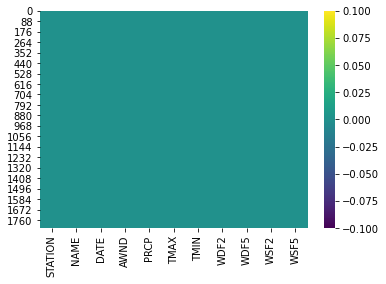

In [16]:
sns.heatmap(data.isnull(),cmap='viridis')

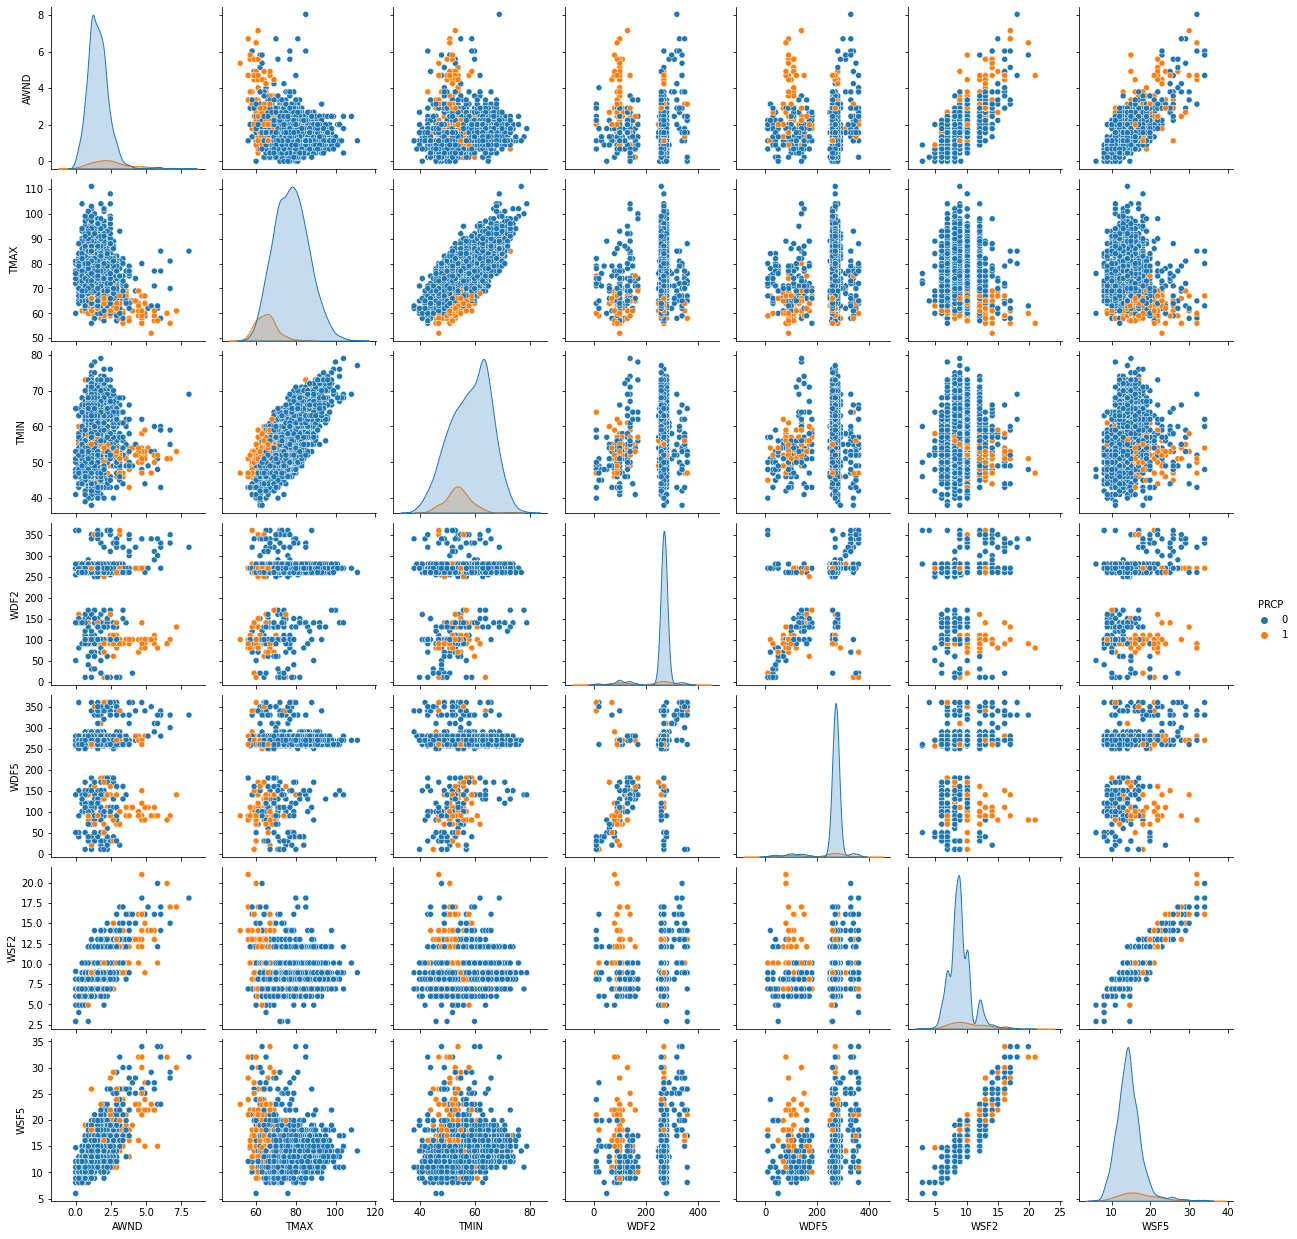

In [17]:
sns.pairplot(data, hue = 'PRCP')

C:\Users\vipendra singh\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRCP', ylabel='count'>

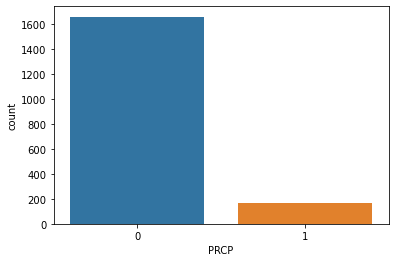

In [18]:
sns.countplot(data['PRCP'])

<AxesSubplot:>

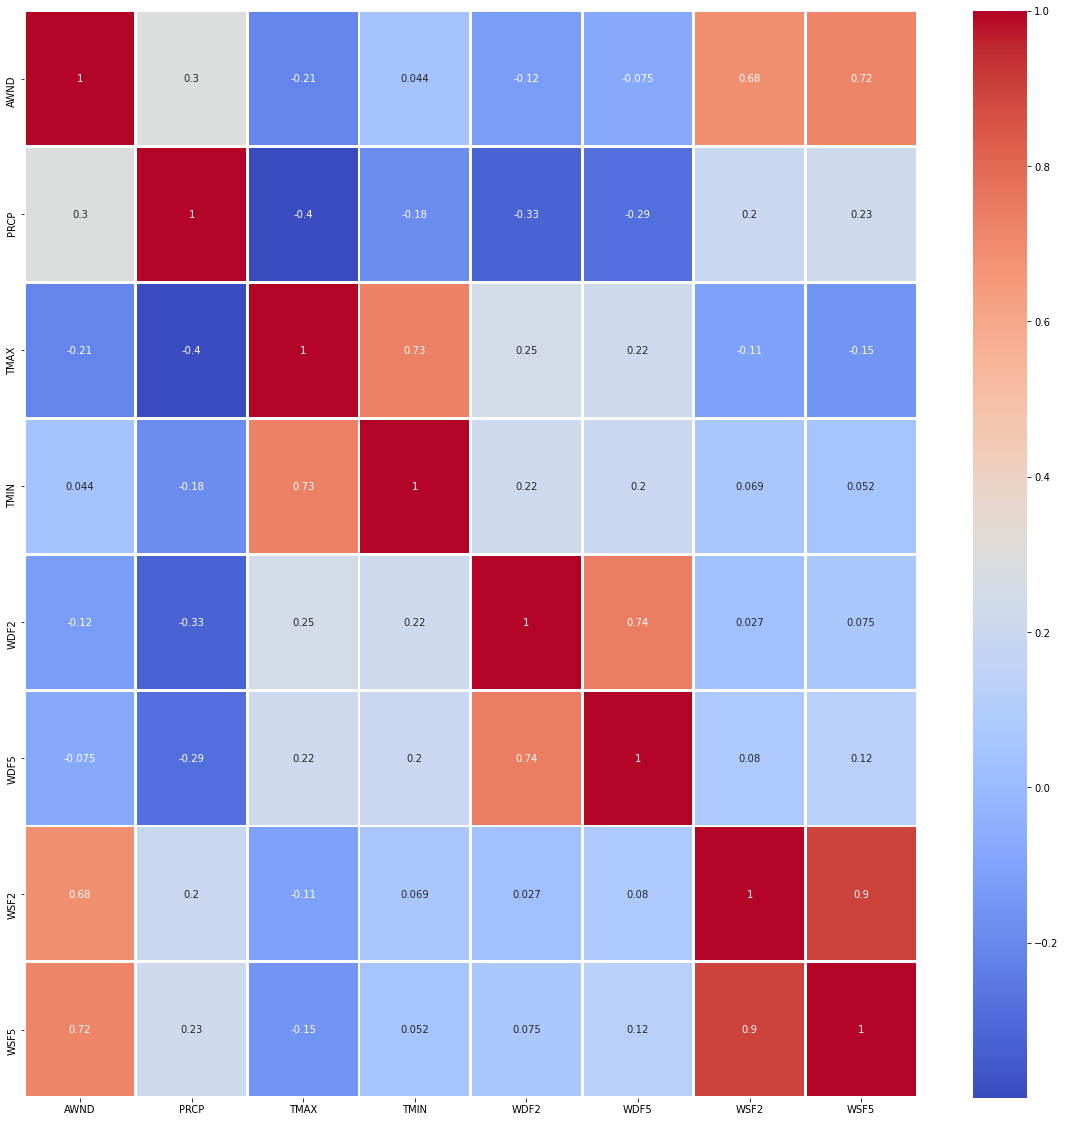

In [19]:
# Heatmap of Correlation matrix of stroke DataFrame
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True, cmap ='coolwarm', linewidths=2)

In [20]:
df= data.drop(['STATION','NAME'],axis=1)

In [21]:
df

,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,2016-01-01,2.46,0,64,43,10.0,30.0,8.1,11.0
1,2016-01-02,2.01,0,65,47,270.0,30.0,6.0,8.9
2,2016-01-03,0.67,0,62,44,150.0,150.0,10.1,14.1
3,2016-01-04,1.34,1,69,55,270.0,280.0,8.1,14.1
4,2016-01-05,2.46,1,59,49,140.0,140.0,10.1,16.1
...,...,...,...,...,...,...,...,...,...
1822,2020-12-27,1.12,1,66,55,270.0,260.0,8.9,18.1
1823,2020-12-28,4.70,1,56,47,90.0,260.0,14.1,21.0
1824,2020-12-29,1.57,0,65,42,340.0,360.0,10.1,18.1
1825,2020-12-30,0.45,0,69,44,260.0,260.0,6.9,12.1


In [22]:
df.dtypes

DATE     object
AWND    float64
PRCP      int32
TMAX      int64
TMIN      int64
WDF2    float64
WDF5    float64
WSF2    float64
WSF5    float64
dtype: object

In [23]:
df['DATE']= pd.to_datetime(df.DATE)

In [24]:
df.dtypes

DATE    datetime64[ns]
AWND           float64
PRCP             int32
TMAX             int64
TMIN             int64
WDF2           float64
WDF5           float64
WSF2           float64
WSF5           float64
dtype: object

In [25]:
df

,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,2016-01-01,2.46,0,64,43,10.0,30.0,8.1,11.0
1,2016-01-02,2.01,0,65,47,270.0,30.0,6.0,8.9
2,2016-01-03,0.67,0,62,44,150.0,150.0,10.1,14.1
3,2016-01-04,1.34,1,69,55,270.0,280.0,8.1,14.1
4,2016-01-05,2.46,1,59,49,140.0,140.0,10.1,16.1
...,...,...,...,...,...,...,...,...,...
1822,2020-12-27,1.12,1,66,55,270.0,260.0,8.9,18.1
1823,2020-12-28,4.70,1,56,47,90.0,260.0,14.1,21.0
1824,2020-12-29,1.57,0,65,42,340.0,360.0,10.1,18.1
1825,2020-12-30,0.45,0,69,44,260.0,260.0,6.9,12.1


In [26]:
df['DATE']=df['DATE'].dt.strftime('%d%m%Y')

In [27]:
df

,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,01012016,2.46,0,64,43,10.0,30.0,8.1,11.0
1,02012016,2.01,0,65,47,270.0,30.0,6.0,8.9
2,03012016,0.67,0,62,44,150.0,150.0,10.1,14.1
3,04012016,1.34,1,69,55,270.0,280.0,8.1,14.1
4,05012016,2.46,1,59,49,140.0,140.0,10.1,16.1
...,...,...,...,...,...,...,...,...,...
1822,27122020,1.12,1,66,55,270.0,260.0,8.9,18.1
1823,28122020,4.70,1,56,47,90.0,260.0,14.1,21.0
1824,29122020,1.57,0,65,42,340.0,360.0,10.1,18.1
1825,30122020,0.45,0,69,44,260.0,260.0,6.9,12.1


C:\Users\vipendra singh\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AWND'>

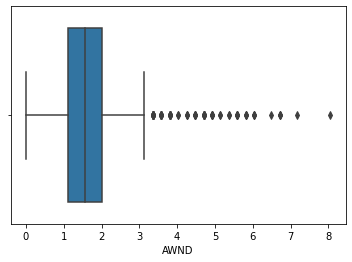

In [28]:
sns.boxplot(df['AWND'])

In [29]:
y = df['PRCP']
y.head()

0    0
1    0
2    0
3    1
4    1
Name: PRCP, dtype: int32

In [30]:
X = df.drop(['PRCP'],axis=1)
X.head()

,DATE,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,01012016,2.46,64,43,10.0,30.0,8.1,11.0
1,02012016,2.01,65,47,270.0,30.0,6.0,8.9
2,03012016,0.67,62,44,150.0,150.0,10.1,14.1
3,04012016,1.34,69,55,270.0,280.0,8.1,14.1
4,05012016,2.46,59,49,140.0,140.0,10.1,16.1


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 27)

In [32]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [33]:
from sklearn.naive_bayes import GaussianNB


In [34]:
nbayes_classifier = GaussianNB()
nbayes_classifier.fit(X_train, y_train)


GaussianNB()

In [35]:
y_pred_nb = nbayes_classifier.predict(X_test)
accuracy_score(y_test, y_pred_nb)

0.8715846994535519

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logR = LogisticRegression()
logR.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred_logR = logR.predict(X_test)
accuracy_score(y_test,y_pred_logR)

0.9398907103825137

In [39]:
#xgBoost Classifier without using Random Search
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_score(y_test,y_pred_xgb)

C:\Users\vipendra singh\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:49:12] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vipendra singh\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.9316939890710383

In [40]:
#declaring parameters
params = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

In [41]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[09:49:19] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vipendra singh\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_paralle...0,
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subsample=1,
        

In [42]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
xgboost_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
xgboost_classifier.fit(X_train, y_train)
y_pred_xgboost = xgboost_classifier.predict(X_test)

[09:49:19] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vipendra singh\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [45]:
accuracy_score(y_test, y_pred_xgboost)

0.9344262295081968

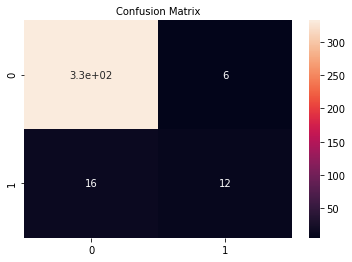

In [46]:
cm = confusion_matrix(y_test, y_pred_logR)
plt.title('Confusion Matrix', fontsize = 10)
sns.heatmap(cm, annot = True)
plt.show()

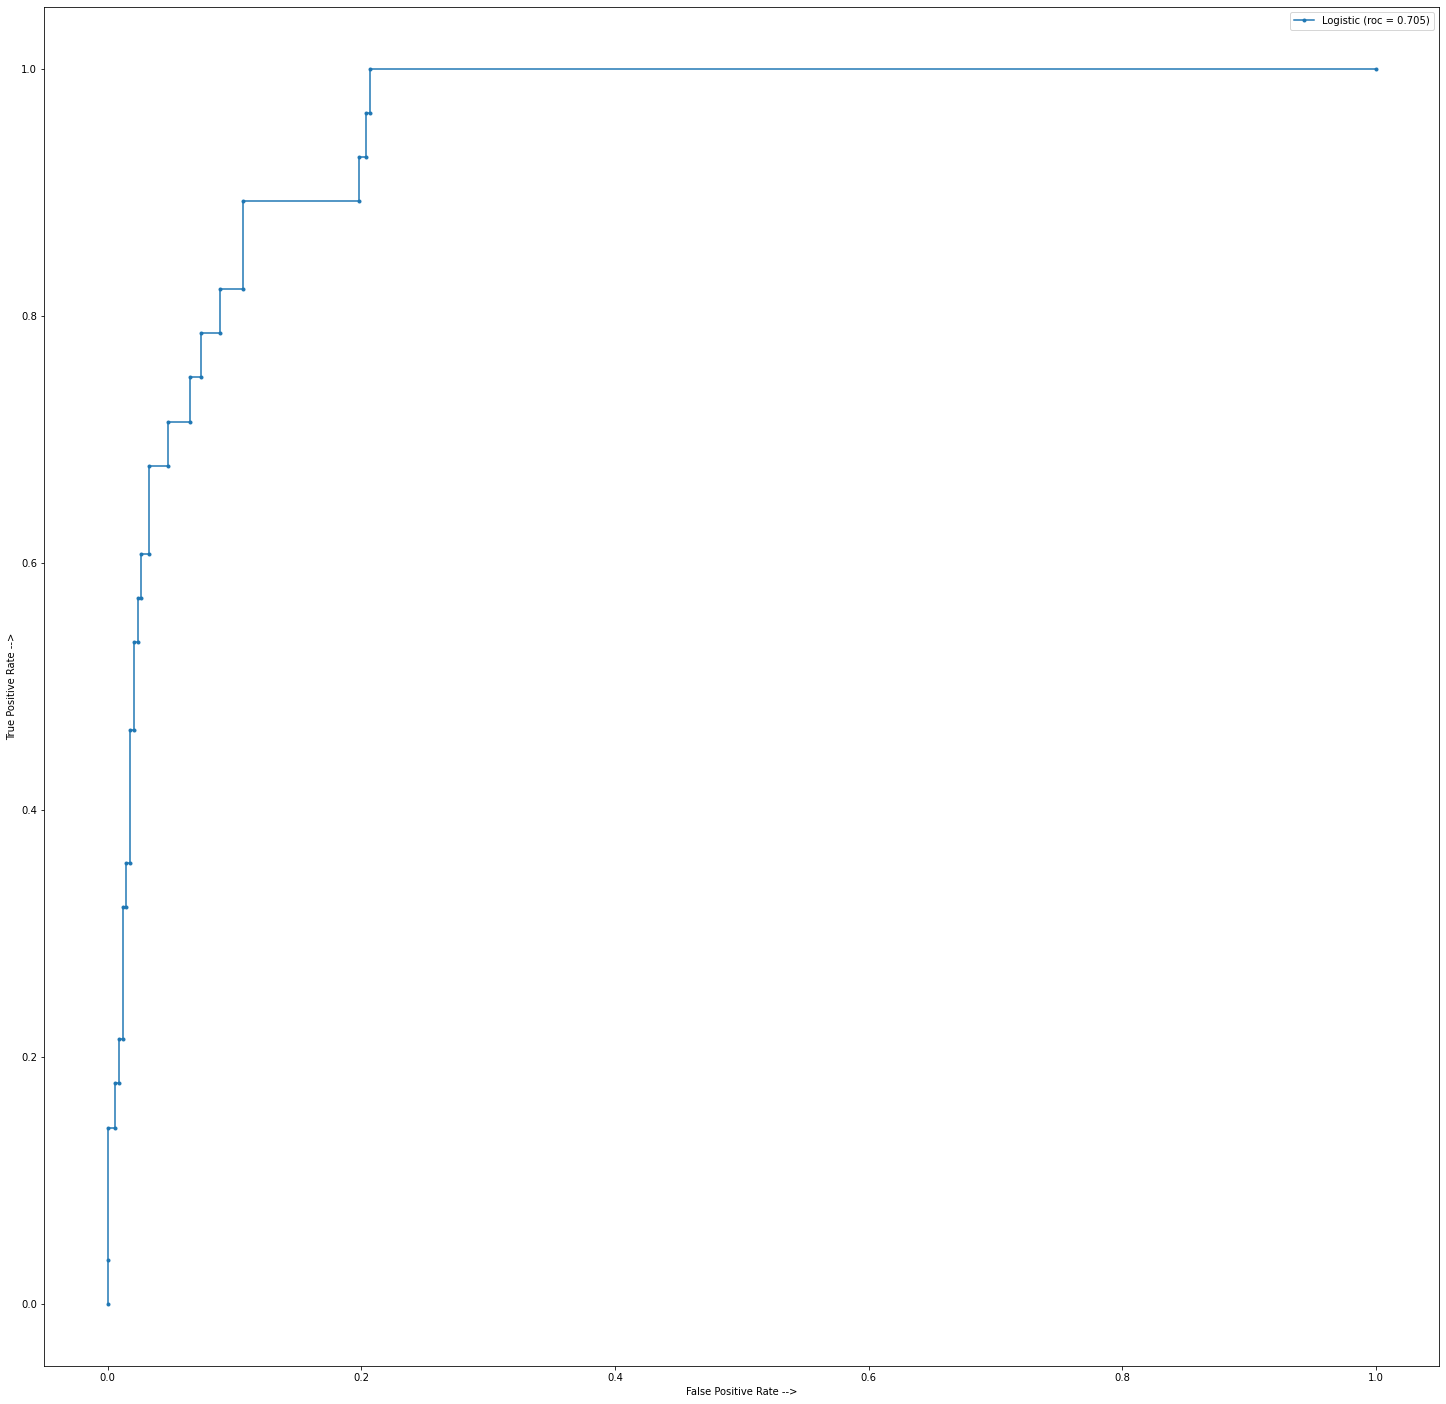

In [52]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
log_roc_auc = roc_auc_score(y_test,logR.predict(X_test))
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, logR.predict_proba(X_test)[:,1])
auc_logistic = auc(logistic_fpr, logistic_tpr)



plt.figure(figsize=(25, 25))

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (roc = %0.3f)' % log_roc_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()

Text(0, 0.5, 'True Positive Rate -->')

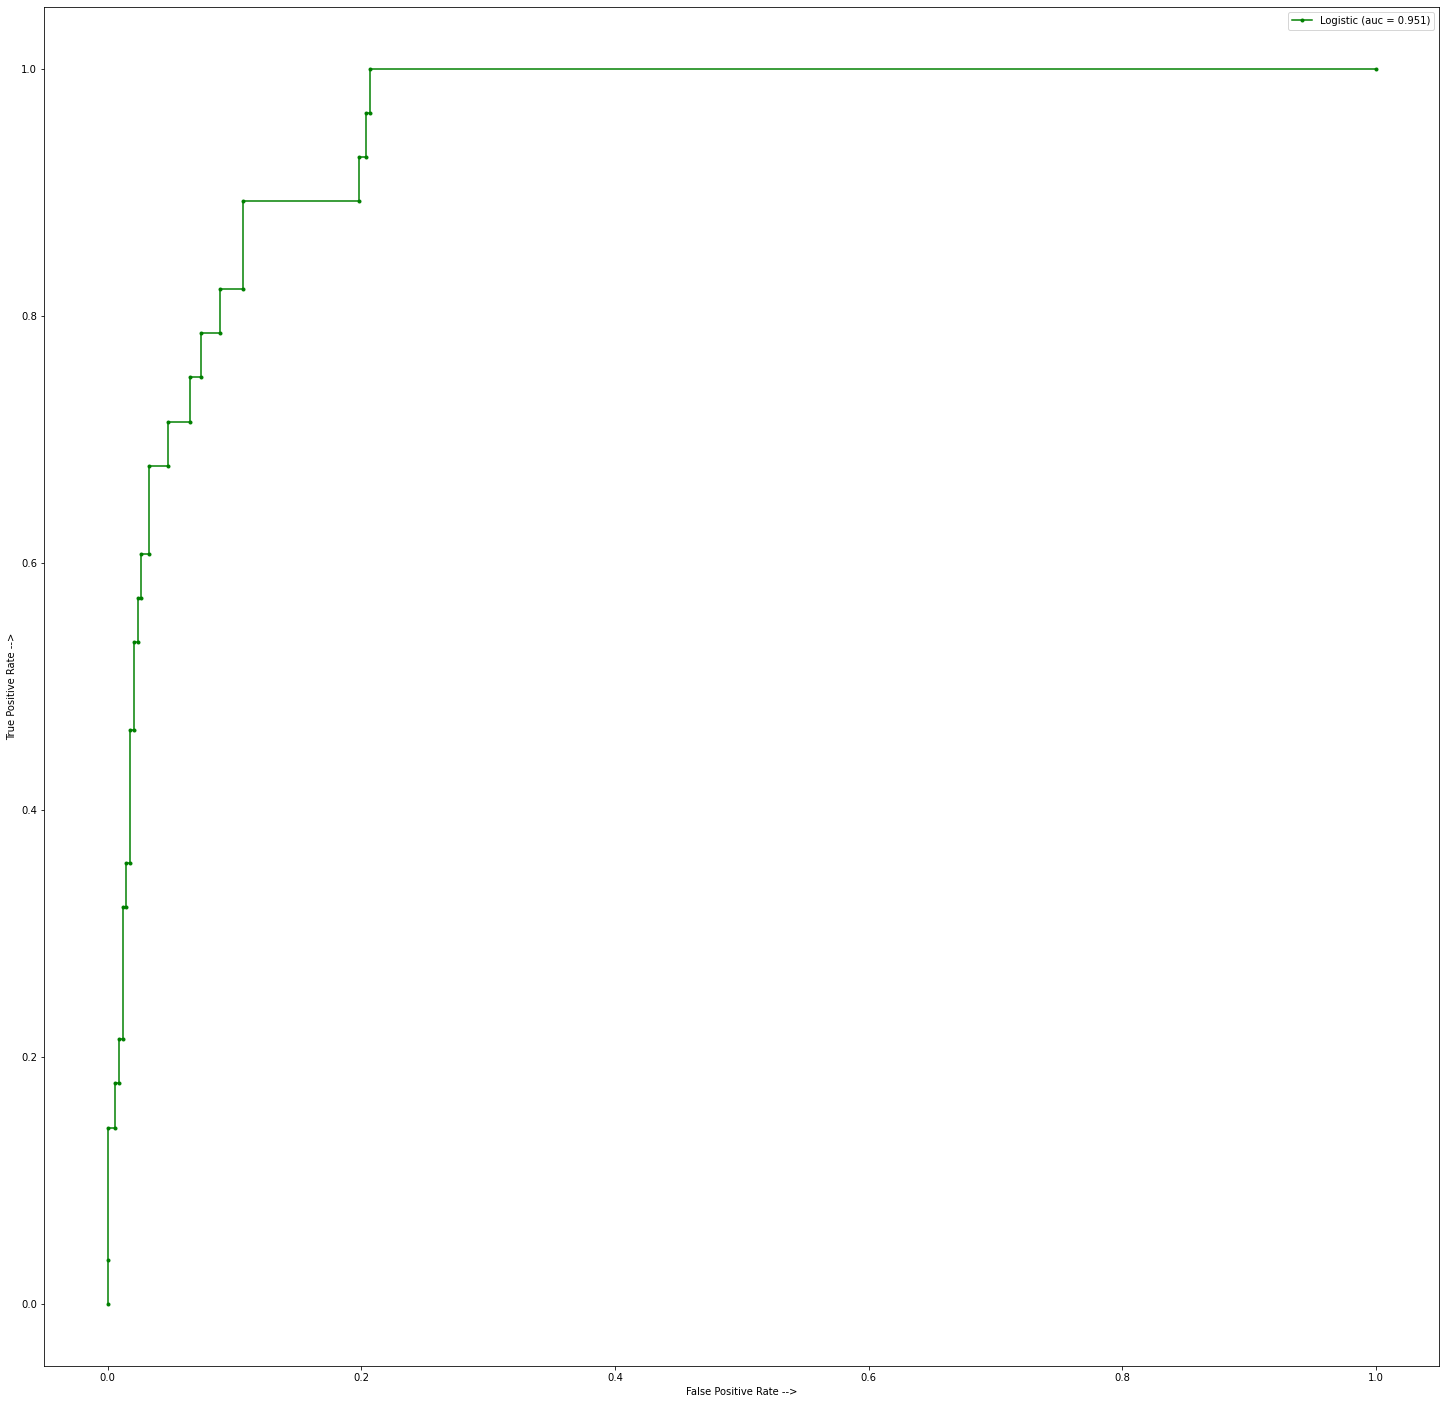

In [51]:
plt.figure(figsize=(25,25))
plt.plot(logistic_fpr, logistic_tpr, marker='.',color='g', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.legend()
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')